# Here we compare the two ELFIN passes to see if the IB moved. 
ELFIN-B pass started at 3:35 UT, while the ELFIN-A pass started at 4:14 UT.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

import pad

In [2]:
time_ranges_str = np.array([
    ['2022-09-04T03:35', '2022-09-04T03:40'],
    ['2022-09-04T04:14', '2022-09-04T04:23']
    ])
time_ranges = pd.to_datetime(time_ranges_str.flatten()).to_numpy().reshape(time_ranges_str.shape)

sc_ids = [
    'b',
    'a'
]
mlat_bounds = [60, 70]

In [3]:
pad_objs = []
for sc_id, time_range in zip(sc_ids, time_ranges_str):
    pad_objs.append(pad.EPD_PAD(
        sc_id, time_range, start_pa=0, min_counts=None, accumulate=1, spin_time_tol=(2.5, 12),
        lc_exclusion_angle=0)
    )

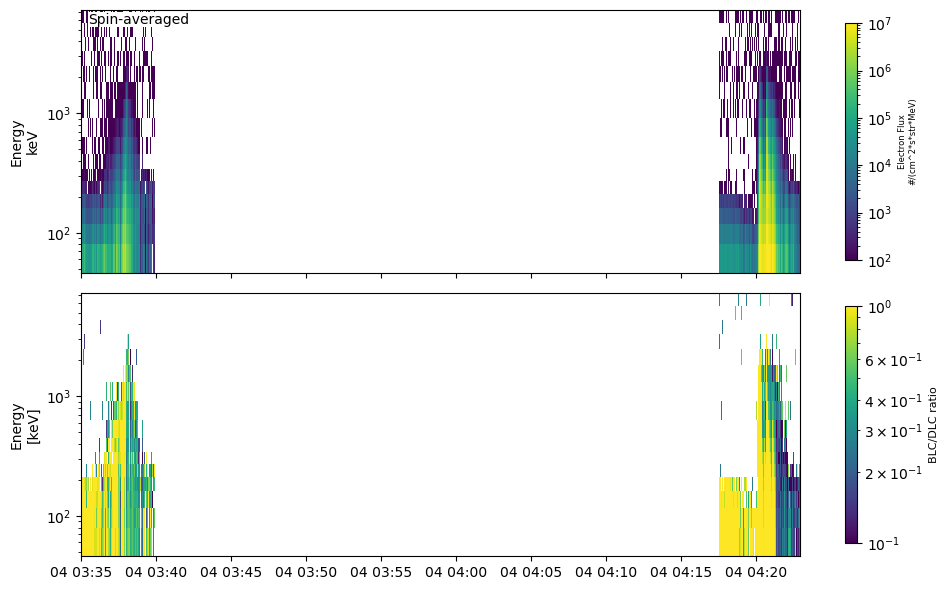

In [4]:
fig, ax = plt.subplots(len(pad_objs), 1, sharex=True, figsize=(10, 6))
for i, pad_obj in enumerate(pad_objs):
    if i == 0:
        colorbar=True
    else:
        colorbar=False
    pad_obj.plot_omni(ax=ax[0], colorbar=colorbar, vmin=1E2, vmax=1E7)
    pad_obj.plot_blc_dlc_ratio(ax=ax[1], colorbar=colorbar, vmin=0.1, vmax=1)
plt.tight_layout()

# Plot the ELFIN-B and -A data aligned by MLAT.

2022-09-04 03:35:56 2022-09-04 03:38:41
2022-09-04 04:18:53 2022-09-04 04:21:35


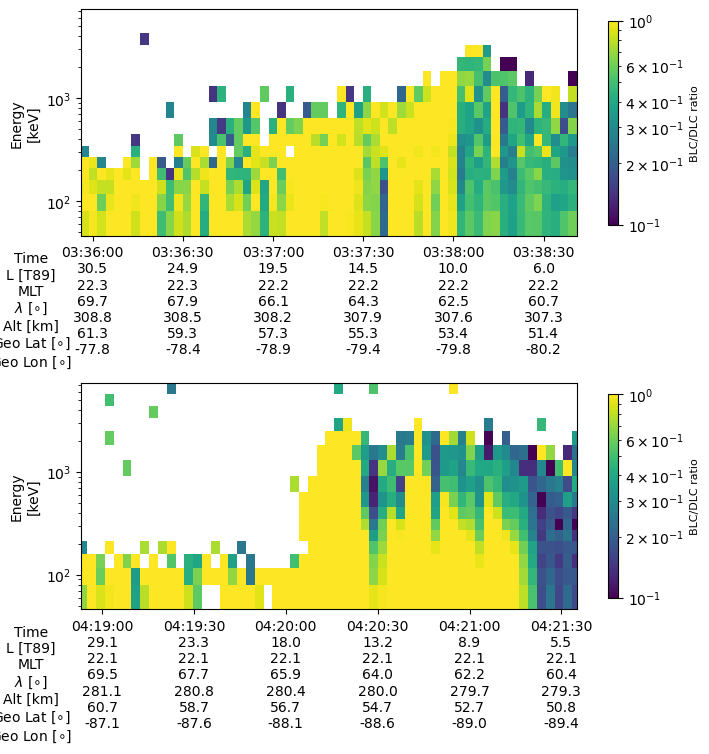

In [5]:
fig, ax = plt.subplots(len(pad_objs), 1, figsize=(8, 10))

for ax_i, pad_obj, time_range in zip(ax, pad_objs, time_ranges):
    transformed_state = pad_obj.transform_state()
    filtered_state = transformed_state[
        (transformed_state.mlat >= mlat_bounds[0]) &
        (transformed_state.mlat <= mlat_bounds[1]) &
        (transformed_state.index >= time_range[0]) &
        (transformed_state.index <= time_range[1])
        ]
    print(f'{filtered_state.index[0]} {filtered_state.index[-1]}')
    pad_obj.plot_blc_dlc_ratio(ax=ax_i)
    pad_obj.plot_position(ax=ax_i)
    ax_i.set_xlim(filtered_state.index[0], filtered_state.index[-1])
plt.subplots_adjust(hspace=0.65)

Looks like the IB retreated poleward from 62.5 deg MLAT at 03:38 UT to 65 deg MLAT at 04:20:15 UT.

Alternative interpretation: Drew thinks that the field lines that the 03:36-03:28 fluxes mapped to may correspond to the same field lines spanning the 04:20:00-04:20:30 fluxes during the substorm.